Socila circles: Twitter
This dataset consists of 'circles' (or 'lists') from Twitter. 
Twitter data was crawled from public sources. 
The dataset includes node features (profiles), circles, and ego networks.

First we look at the info of the full datatset and then we view a sample from this dataset so that we can create a subset of it:

Loading a sample of 100000 edges from the dataset...
Sampled graph loaded: 5280 nodes, 72979 edges
Creating a subset of nodes with degree > 50...
Subset created: 880 nodes, 19502 edges
Analyzing sampled graph...
Analyzing subset graph...
Sampled Graph Stats: {'num_nodes': 5280, 'num_edges': 72979, 'average_clustering_coefficient': 0.49493161743685543, 'approx_diameter': 'Graph not connected', 'largest_connected_component_size': 5116, 'degree_distribution': Counter({1: 267, 3: 216, 2: 211, 4: 200, 6: 186, 5: 166, 8: 162, 7: 156, 9: 148, 11: 146, 10: 139, 13: 123, 14: 113, 12: 110, 16: 98, 15: 96, 17: 92, 20: 90, 18: 83, 19: 80, 21: 77, 22: 73, 33: 71, 25: 68, 29: 68, 24: 66, 27: 65, 23: 65, 31: 62, 26: 58, 36: 54, 34: 53, 28: 53, 38: 51, 30: 49, 35: 48, 40: 48, 32: 48, 43: 43, 39: 41, 45: 40, 42: 40, 50: 39, 41: 39, 49: 36, 37: 36, 44: 36, 47: 34, 57: 33, 53: 32, 55: 31, 48: 31, 51: 30, 52: 28, 58: 28, 54: 27, 46: 26, 70: 26, 62: 26, 60: 25, 56: 24, 66: 23, 59: 20, 65: 17, 68: 17, 67: 1

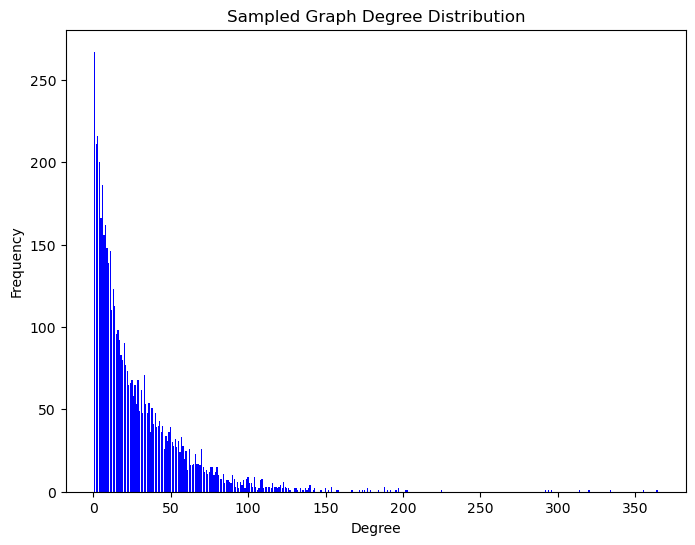

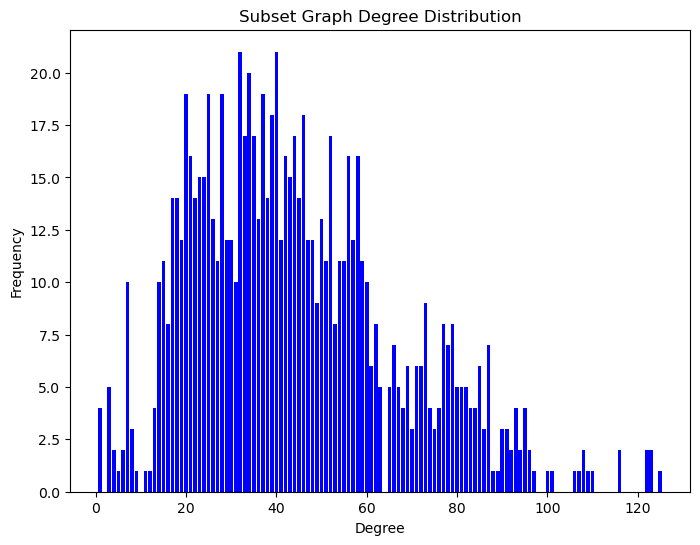

In [22]:
# File path: twitter_analysis_optimized.py

import networkx as nx
import matplotlib.pyplot as plt
from collections import Counter
import random

# Load a sampled dataset
def load_sampled_twitter_data(file_path, sample_edges=100000):
    G = nx.Graph()
    with open(file_path, 'r') as f:
        for i, line in enumerate(f):
            if i >= sample_edges:
                break  # Stop reading after reaching the sample size
            edge = line.strip().split()
            if len(edge) == 2:
                G.add_edge(edge[0], edge[1])
    return G

# Create subset of the graph
def create_graph_subset(G, degree_threshold=50):
    # Filter nodes based on degree threshold
    nodes_subset = [node for node, degree in dict(G.degree()).items() if degree > degree_threshold]
    subset_G = G.subgraph(nodes_subset)
    return subset_G

# Approximate analysis of graph statistics
def analyze_graph_approx(G):
    stats = {
        "num_nodes": G.number_of_nodes(),
        "num_edges": G.number_of_edges(),
        "average_clustering_coefficient": nx.average_clustering(G),
        "approx_diameter": nx.approximation.diameter(G) if nx.is_connected(G) else "Graph not connected",
        "largest_connected_component_size": len(max(nx.connected_components(G), key=len)),
        "degree_distribution": Counter(dict(G.degree()).values()),
    }
    return stats

# Visualize degree distribution
def plot_degree_distribution(degree_distribution, title="Degree Distribution"):
    degrees = list(degree_distribution.keys())
    counts = list(degree_distribution.values())
    plt.figure(figsize=(8, 6))
    plt.bar(degrees, counts, width=0.80, color='b')
    plt.title(title)
    plt.xlabel("Degree")
    plt.ylabel("Frequency")
    plt.show()

# Main function
def main():
    # File path
    file_path = 'twitter_combined.txt'
    sample_size = 100000  # Number of edges to sample
    degree_threshold = 50  # Subset criteria
    
    # Load a sampled dataset
    print(f"Loading a sample of {sample_size} edges from the dataset...")
    G = load_sampled_twitter_data(file_path, sample_edges=sample_size)
    print(f"Sampled graph loaded: {G.number_of_nodes()} nodes, {G.number_of_edges()} edges")
    
    # Create subset
    print(f"Creating a subset of nodes with degree > {degree_threshold}...")
    subset_G = create_graph_subset(G, degree_threshold=degree_threshold)
    print(f"Subset created: {subset_G.number_of_nodes()} nodes, {subset_G.number_of_edges()} edges")
    
    # Analyze sampled graph and subset
    print("Analyzing sampled graph...")
    sampled_graph_stats = analyze_graph_approx(G)
    print("Analyzing subset graph...")
    subset_graph_stats = analyze_graph_approx(subset_G)
    
    # Print stats
    print("Sampled Graph Stats:", sampled_graph_stats)
    print("Subset Graph Stats:", subset_graph_stats)
    
    # Visualize degree distribution
    plot_degree_distribution(sampled_graph_stats["degree_distribution"], "Sampled Graph Degree Distribution")
    plot_degree_distribution(subset_graph_stats["degree_distribution"], "Subset Graph Degree Distribution")

if __name__ == "__main__":
    main()
